In [1]:
import os
from functools import partial
from train import main
from helpers.data import load_dataset
from helpers.models import generate, load_model, evaluate_model, generate
from helpers.util import ensure_reproducibility
from sklearn.metrics import ConfusionMatrixDisplay

/conda/envs/hate-detection/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Model training

In [2]:
dataset_size = 14400
max_seq_length = 512

In [3]:
main(
    model_name="unsloth/mistral-7b-instruct-v0.2-bnb-4bit",
    dataset_size=dataset_size,
    batch_size=64,
    max_seq_length=max_seq_length,
)

2024-01-28 17:38:37 - train:49 - INFO - Using device cuda
2024-01-28 17:38:37 - train:50 - INFO - Loading dataset with 14400 examples
Map (num_proc=24): 100%|████████████████████████████████████████████████| 14400/14400 [00:01<00:00, 11308.74 examples/s]
2024-01-28 17:38:41 - hate-detection.data:46 - INFO - Loaded dataset ucberkeley-dlab/measuring-hate-speech with 11520 training examples and 2880 test examples
2024-01-28 17:38:41 - train:52 - INFO - Loading model unsloth/mistral-7b-instruct-v0.2-bnb-4bit
==((====))==  Unsloth: Fast Mistral patching release 2024.1
   \\   /|    GPU: NVIDIA GeForce RTX 3090. Max memory: 23.669 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.1.2. CUDA = 8.6. CUDA Toolkit = 11.8.
\        /    Bfloat16 = TRUE. Xformers = 0.0.23.post1. FA = True.
 "-____-"     Apache 2 free license: http://github.com/unslothai/unsloth
You passed `quantization_config` to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantiz

Unsloth: `use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`


Step,Training Loss
100,1.363100


Evaluating: 100%|███████████████████████████████████████████████████████████████████████| 45/45 [19:07<00:00, 25.51s/it]
2024-01-28 18:25:50 - train:113 - INFO - Post-training evaluation:               precision    recall  f1-score   support

        Hate       0.74      0.91      0.82      1049
     Neutral       0.66      0.31      0.42       712
  Supportive       0.80      0.90      0.85      1119
     Unknown       0.00      0.00      0.00         0

    accuracy                           0.76      2880
   macro avg       0.55      0.53      0.52      2880
weighted avg       0.74      0.76      0.73      2880



make: Entering directory '/projects/hate-detection/llama.cpp'
I llama.cpp build info: 
I UNAME_S:   Linux
I UNAME_P:   x86_64
I UNAME_M:   x86_64
I CFLAGS:    -I. -Icommon -D_XOPEN_SOURCE=600 -D_GNU_SOURCE -DNDEBUG  -std=c11   -fPIC -O3 -Wall -Wextra -Wpedantic -Wcast-qual -Wno-unused-function -Wshadow -Wstrict-prototypes -Wpointer-arith -Wmissing-prototypes -Werror=implicit-int -Werror=implicit-function-declaration -pthread -march=native -mtune=native -Wdouble-promotion 
I CXXFLAGS:  -I. -Icommon -D_XOPEN_SOURCE=600 -D_GNU_SOURCE -DNDEBUG  -std=c++11 -fPIC -O3 -Wall -Wextra -Wpedantic -Wcast-qual -Wno-unused-function -Wmissing-declarations -Wmissing-noreturn -pthread  -march=native -mtune=native -Wno-array-bounds -Wno-format-truncation -Wextra-semi
I NVCCFLAGS:  
I LDFLAGS:    
I CC:        cc (Ubuntu 13.2.0-4ubuntu3) 13.2.0
I CXX:       g++ (Ubuntu 13.2.0-4ubuntu3) 13.2.0

rm -vrf *.o tests/*.o *.so *.dll benchmark-matmult common/build-info.cpp *.dot *.gcno tests/*.gcno *.gcda tests/

100%|███████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 57.98it/s]


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model... This might take 5 minutes for Llama-7b...
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp will take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GUUF 16bits will take 3 minutes.
\        /    [2] Converting GGUF 16bits to q8_0 will take 20 minutes.
 "-____-"     In total, you will have to wait around 26 minutes.

Unsloth: [0] Installing llama.cpp. This will take 3 minutes...
Unsloth: [1] Converting HF into GGUF format. This will take 3 minutes...
Loading model file ../results/ggufed/unsloth/mistral-7b-instruct-v0.2-bnb-4bit/model-00001-of-00003.safetensors
Loading model file ../results/ggufed/unsloth/mistral-7b-instruct-v0.2-bnb-4bit/model-00001-of-00003.safetensors
Loading model file ../results/ggufed/unsloth/mistral-7b-instruct-v0.2-bnb-4bit/model-00002-of-00003.safetensors
Loading model file ../results/ggufed/unsloth/mistral-7b-instruct-v0.2-bnb-4bit/model-00003

/conda/envs/hate-detection/lib/python3.10/subprocess.py:961: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


model.layers.29.input_layernorm.weight           -> blk.29.attn_norm.weight                  | BF16   | [4096]
model.layers.29.mlp.down_proj.weight             -> blk.29.ffn_down.weight                   | BF16   | [4096, 14336]
model.layers.29.mlp.gate_proj.weight             -> blk.29.ffn_gate.weight                   | BF16   | [14336, 4096]
model.layers.29.mlp.up_proj.weight               -> blk.29.ffn_up.weight                     | BF16   | [14336, 4096]
model.layers.29.post_attention_layernorm.weight  -> blk.29.ffn_norm.weight                   | BF16   | [4096]
model.layers.29.self_attn.k_proj.weight          -> blk.29.attn_k.weight                     | BF16   | [1024, 4096]
model.layers.29.self_attn.o_proj.weight          -> blk.29.attn_output.weight                | BF16   | [4096, 4096]
model.layers.29.self_attn.q_proj.weight          -> blk.29.attn_q.weight                     | BF16   | [4096, 4096]
model.layers.29.self_attn.v_proj.weight          -> blk.29.attn_v.weight 

## Trained model evaluation

In [3]:
ensure_reproducibility();

In [4]:
model, tokenizer = load_model(
    model_name="../results/unsloth/mistral-7b-instruct-v0.2-bnb-4bit/",
    max_seq_length=max_seq_length,
    with_lora=False,
)

==((====))==  Unsloth: Fast Mistral patching release 2024.1
   \\   /|    GPU: NVIDIA GeForce RTX 3090. Max memory: 23.669 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.1.2. CUDA = 8.6. CUDA Toolkit = 11.8.
\        /    Bfloat16 = TRUE. Xformers = 0.0.23.post1. FA = True.
 "-____-"     Apache 2 free license: http://github.com/unslothai/unsloth
You passed `quantization_config` to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` attribute will be overwritten with the one you passed to `from_pretrained`.
Unsloth 2024.1 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [5]:
train_dataset, test_dataset = load_dataset(size=dataset_size)

2024-01-28 20:06:06 - hate-detection.data:46 - INFO - Loaded dataset ucberkeley-dlab/measuring-hate-speech with 11520 training examples and 2880 test examples


In [6]:
template = open(os.path.join("config", "TEMPLATE")).read()

In [15]:
generate_fn = partial(generate, model=model, tokenizer=tokenizer, template=template)

In [16]:
test_dataset[0]

{'prompt': 'Human trafficking is a form of modern slavery and vulnerable people, especially women and girls, get trapped and exploited every day. Alberta will be taking real action to fight it and support victims and those at risk. URL #ableg #abpoli',
 'completion': 'Supportive'}

In [17]:
generate_fn(test_dataset[0]['prompt'])

['Supportive']

In [18]:
test_dataset[-1]

{'prompt': '>Some incels give a lot but get nothing back   And so should be rewarded with pussy? Are you aware that said pussy is attached to a fully realized human being with the exact same natural rights to happiness as you? And that she does not deserve to be forced to have sex with anyone she finds undesirable?    Do you get that women have the same right to reject men that men have to reject women?    How committed are you to the belief that women are holes, rather than human beings deserving of respect?',
 'completion': 'Supportive'}

In [19]:
generate_fn(test_dataset[-1]['prompt'])

['Supportive']

In [20]:
eval_results = evaluate_model(generate_fn=generate_fn, test_dataset=test_dataset)

Evaluating: 100%|███████████████████████████████████████████████████████████████████████| 90/90 [02:45<00:00,  1.84s/it]


In [21]:
print(eval_results['classification_report'])

              precision    recall  f1-score   support

        Hate       0.75      0.91      0.82      1049
     Neutral       0.69      0.29      0.41       712
  Supportive       0.78      0.91      0.84      1119
     Unknown       0.00      0.00      0.00         0

    accuracy                           0.76      2880
   macro avg       0.56      0.53      0.52      2880
weighted avg       0.75      0.76      0.73      2880



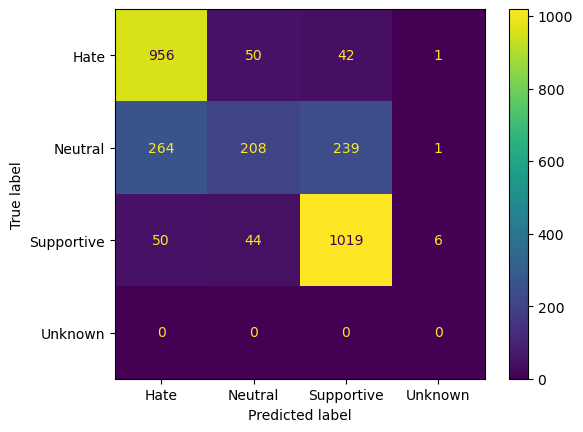

In [22]:
ConfusionMatrixDisplay(eval_results['confusion_matrix'], display_labels=["Hate", "Neutral", "Supportive", "Unknown"]).plot();

## Inference

In [23]:
import requests

In [24]:
base_url = "http://127.0.0.1:5000/"

In [33]:
requests.get(base_url + 'healthcheck')

<Response [200]>

In [38]:
hate_tweet = "This is what low IQ looks like.  Australia spends $8.5 billion on beef per year. Does that grow on trees? You fucking ape.  Also, we slaughter kheer/firni on Eid ul Fitr not animals. URL"
sup_tweet = "Human trafficking is a form of modern slavery and vulnerable people, especially women and girls, get trapped and exploited every day. Alberta will be taking real action to fight it and support victims and those at risk. URL #ableg #abpoli'"

In [43]:
requests.post(base_url + "infer", data=hate_tweet).text

'Neutral'

In [44]:
requests.post(base_url + "infer", data=sup_tweet).text

'Supportive'